In [4]:
#| echo: false
#calling packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 

#importting data
tax_data = pd.read_csv('/Users/avanthpakanati/Desktop/ECON:HLTH Research Seminar /Homework3/data/Output/taxburden_data.csv')



## Question 1

/var/folders/2q/wzjp_2kd355b8clhzqwmytb40000gn/T/ipykernel_14590/86190851.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tax_data_1['tax_change'] = tax_data_1.groupby('state')['tax_state'].diff().ne(0).astype(int)


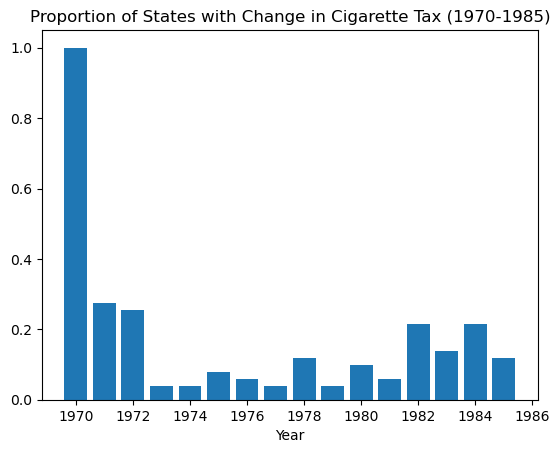

In [5]:
#summarize the data
#question 1 

#finding prop of states that had change in tax from 1970-1986
tax_data = tax_data.sort_values(by=['state', 'Year'])
tax_data_1 = tax_data[(tax_data['Year']>=1970) & (tax_data['Year']<=1985)]
tax_data_1['tax_change'] = tax_data_1.groupby('state')['tax_state'].diff().ne(0).astype(int)
tax_change = tax_data_1.groupby('Year')['tax_change'].mean()


plt.bar(tax_change.index, tax_change.values)
plt.title('Proportion of States with Change in Cigarette Tax (1970-1985)')
plt.xlabel('Year')
plt.show()


## Question 2

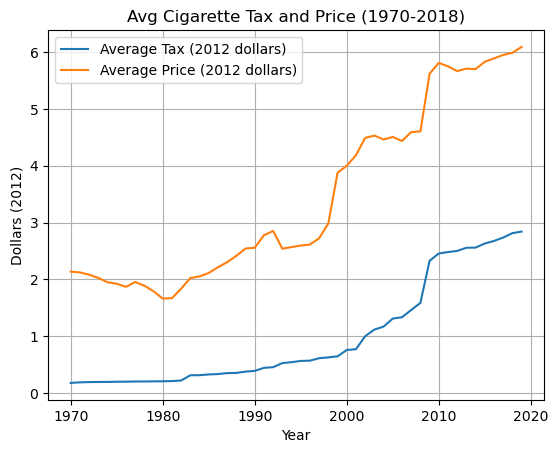

In [6]:
#| echo: false
#question 2 
#in 2012 $$$
#cpi_2012 = tax_data.loc[tax_data['Year'] == 2012, 'price_cpi'].iloc[0]
#tax_data['tax_dollar'] = tax_data['tax_dollar'] * (cpi_2012 / tax_data['price_cpi'])
#tax_data['price_per_pack_2012'] = tax_data['cost_per_pack'] * (cpi_2012 / tax_data['price_cpi'])

avg_values = tax_data.groupby('Year')[['tax_dollar', 'price_cpi']].mean()

#plot graph
plt.plot(avg_values.index, avg_values['tax_dollar'], label='Average Tax (2012 dollars)')
plt.plot(avg_values.index, avg_values['price_cpi'], label='Average Price (2012 dollars)')
plt.legend()
plt.title('Avg Cigarette Tax and Price (1970-2018)')
plt.xlabel('Year')
plt.ylabel('Dollars (2012)')
plt.grid(True)
plt.show()


## Question 3

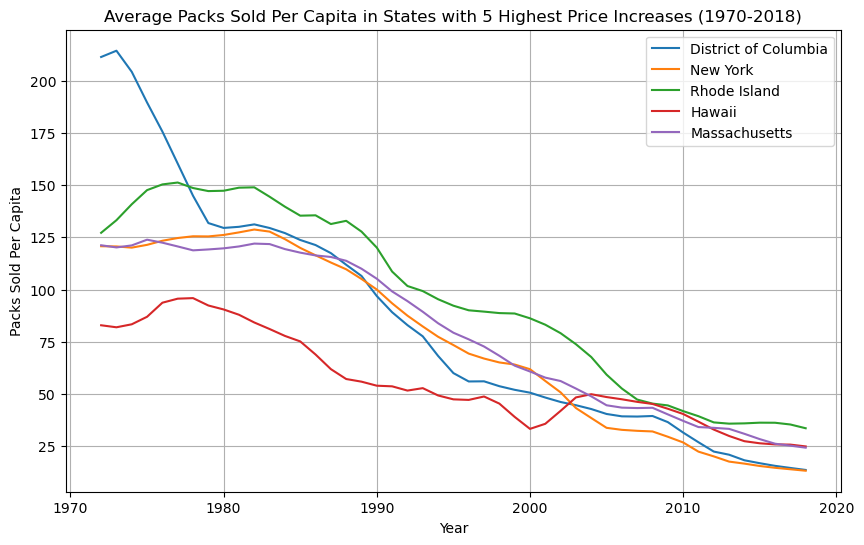

In [7]:
#| echo: false
#question 3
#years 1970-2018
tax_data_3 = tax_data[(tax_data['Year'] >= 1970) & (tax_data['Year'] <= 2018)]

change_in_price = tax_data_3.groupby('state')['price_cpi'].agg(['first', 'last'])
change_in_price['price_increase'] = change_in_price['last'] - change_in_price['first']

#finding 5 states with highest price increase 
top_5_states = change_in_price.nlargest(5, 'price_increase').index.tolist()
top_5 = tax_data_3[tax_data_3['state'].isin(top_5_states)]


#plotting the graph

plt.figure(figsize=(10, 6))
for state in top_5_states:
    state_data = top_5[top_5['state'] == state]
    plt.plot(state_data['Year'], state_data['sales_per_capita'].rolling(window=3).mean(), label=state)

plt.title('Average Packs Sold Per Capita in States with 5 Highest Price Increases (1970-2018)')   
plt.xlabel('Year')
plt.ylabel('Packs Sold Per Capita') 
plt.legend()
plt.grid(True)
plt.show() 

## Question 4

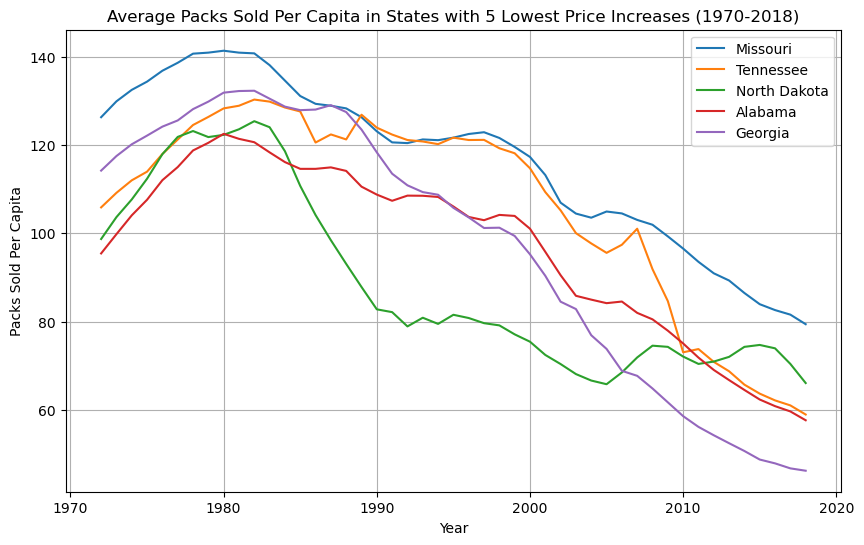

In [8]:
#| echo: false
#question 4
#Lowest increase in cig prices


# 5 states with the lowest price increase
bottom_5_states = change_in_price.nsmallest(5, 'price_increase').index.tolist()
bottom_5 = tax_data_3[tax_data_3['state'].isin(bottom_5_states)]

plt.figure(figsize=(10, 6))
for state in bottom_5_states:
    state_data = bottom_5[bottom_5['state'] == state]
    plt.plot(state_data['Year'], state_data['sales_per_capita'].rolling(window=3).mean(), label=state)

plt.title('Average Packs Sold Per Capita in States with 5 Lowest Price Increases (1970-2018)')
plt.xlabel('Year')
plt.ylabel('Packs Sold Per Capita')
plt.legend()
plt.grid(True)
plt.show()

## Question 5

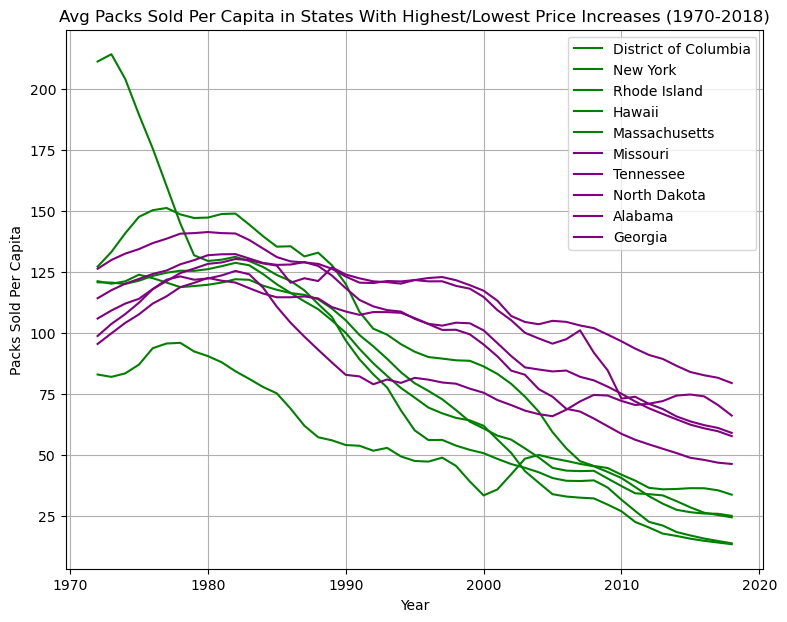

In [9]:
#| echo: false
#question 5 comparing states with lowest and highest price increase 
#putting it all in one graph 
plt.figure(figsize=(9, 7))
for state in top_5_states:
    state_data = top_5[top_5['state'] == state]
    plt.plot(state_data['Year'], state_data['sales_per_capita'].rolling(window=3).mean(), label=state, color='green')
for state in bottom_5_states:
    state_data = bottom_5[bottom_5['state'] == state]
    plt.plot(state_data['Year'], state_data['sales_per_capita'].rolling(window=3).mean(), label=state, color='purple')



plt.title('Avg Packs Sold Per Capita in States With Highest/Lowest Price Increases (1970-2018)')
plt.xlabel('Year')
plt.ylabel('Packs Sold Per Capita')
plt.legend()
plt.grid(True)
plt.show()

Add some analysis for question 5

## Question 6

In [10]:
#| echo: false
#Estimating ATE

#QUESTION 6 

cig_data = tax_data[(tax_data['Year'] >= 1970) & (tax_data['Year'] <= 1990)]
cig_data['ln_sales'] = np.log(cig_data['sales_per_capita'])
cig_data['ln_total_tax'] = np.log(cig_data['tax_dollar'])
cig_data['ln_price'] = np.log(cig_data['price_cpi'])




#  running OLS regression 
X = sm.add_constant(cig_data['ln_price'])  
Y = cig_data['ln_sales']

model = sm.OLS(Y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:               ln_sales   R-squared:                       0.294
Model:                            OLS   Adj. R-squared:                  0.293
Method:                 Least Squares   F-statistic:                     445.1
Date:                Wed, 19 Mar 2025   Prob (F-statistic):           6.98e-83
Time:                        13:49:29   Log-Likelihood:                 263.40
No. Observations:                1071   AIC:                            -522.8
Df Residuals:                    1069   BIC:                            -512.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.3854      0.028    193.692      0.0

/var/folders/2q/wzjp_2kd355b8clhzqwmytb40000gn/T/ipykernel_14590/475737347.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cig_data['ln_sales'] = np.log(cig_data['sales_per_capita'])
/var/folders/2q/wzjp_2kd355b8clhzqwmytb40000gn/T/ipykernel_14590/475737347.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cig_data['ln_total_tax'] = np.log(cig_data['tax_dollar'])
/var/folders/2q/wzjp_2kd355b8clhzqwmytb40000gn/T/ipykernel_14590/475737347.py:9: SettingWithCopyWarning: 
A value is trying to be set on a c

## Question 7 and 8

In [11]:
#| echo: false
#Question 7 and 8, log sales on log prices 
#First stage 
first_stage = sm.OLS(cig_data['ln_price'], sm.add_constant(cig_data['ln_total_tax'])).fit()
print("First stage (ln_price ~ ln_total_tax):\n")
print(first_stage.summary())

First stage (ln_price ~ ln_total_tax):

                            OLS Regression Results                            
Dep. Variable:               ln_price   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.617
Method:                 Least Squares   F-statistic:                     1725.
Date:                Wed, 19 Mar 2025   Prob (F-statistic):          2.80e-225
Time:                        13:49:29   Log-Likelihood:                 1020.7
No. Observations:                1071   AIC:                            -2037.
Df Residuals:                    1069   BIC:                            -2027.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const   

In [12]:
#| echo: false
# Log prices/first stage
price_hat = first_stage.predict(sm.add_constant(cig_data['ln_total_tax']))

# Reduced stage regression (IV Regression)
Reduced_stage = sm.OLS(cig_data['ln_sales'], sm.add_constant(price_hat)).fit()
print("\nSecond stage Regression (ln_sales ~ pricehat):\n")
print(Reduced_stage.summary())


Second stage Regression (ln_sales ~ pricehat):

                            OLS Regression Results                            
Dep. Variable:               ln_sales   R-squared:                       0.236
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     330.3
Date:                Wed, 19 Mar 2025   Prob (F-statistic):           1.56e-64
Time:                        13:49:29   Log-Likelihood:                 221.17
No. Observations:                1071   AIC:                            -438.3
Df Residuals:                    1069   BIC:                            -428.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
con

## Question 9 

In [13]:
#| echo: false
#Question 9 - repeat for 1991-2015
cig_data_2 = tax_data[(tax_data['Year'] >= 1991) & (tax_data['Year'] <= 2015)]

cig_data_2['ln_price'] = np.log(cig_data_2['price_cpi'])
cig_data_2['ln_sales'] = np.log(cig_data_2['sales_per_capita'])
cig_data_2['ln_total_tax'] = np.log(cig_data_2['tax_dollar'])

#running OLS regression
X2 = sm.add_constant(cig_data_2['ln_price'])  
Y2 = cig_data_2['ln_sales']


reg2 = sm.OLS(Y2, X2).fit()
print(reg2.summary())


                            OLS Regression Results                            
Dep. Variable:               ln_sales   R-squared:                       0.561
Model:                            OLS   Adj. R-squared:                  0.561
Method:                 Least Squares   F-statistic:                     1630.
Date:                Wed, 19 Mar 2025   Prob (F-statistic):          4.20e-230
Time:                        13:49:29   Log-Likelihood:                -256.00
No. Observations:                1275   AIC:                             516.0
Df Residuals:                    1273   BIC:                             526.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.6083      0.035    159.600      0.0

/var/folders/2q/wzjp_2kd355b8clhzqwmytb40000gn/T/ipykernel_14590/2081332474.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cig_data_2['ln_price'] = np.log(cig_data_2['price_cpi'])
/var/folders/2q/wzjp_2kd355b8clhzqwmytb40000gn/T/ipykernel_14590/2081332474.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cig_data_2['ln_sales'] = np.log(cig_data_2['sales_per_capita'])
/var/folders/2q/wzjp_2kd355b8clhzqwmytb40000gn/T/ipykernel_14590/2081332474.py:7: SettingWithCopyWarning: 
A value is trying to be set 

In [14]:
#| echo: false
#First stage Regression 
first_stage_2 = sm.OLS(cig_data_2['ln_price'], sm.add_constant(cig_data_2['ln_total_tax'])).fit() 

print("First-stage  (ln_price ~ ln_total_tax):\n")
print(first_stage_2.summary())

First-stage  (ln_price ~ ln_total_tax):

                            OLS Regression Results                            
Dep. Variable:               ln_price   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     8390.
Date:                Wed, 19 Mar 2025   Prob (F-statistic):               0.00
Time:                        13:49:29   Log-Likelihood:                 874.63
No. Observations:                1275   AIC:                            -1745.
Df Residuals:                    1273   BIC:                            -1735.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const  

In [15]:
#| echo: false
#reduced form regression
price_hat_2 = first_stage_2.predict(sm.add_constant(cig_data_2['ln_total_tax']))
Reduced_stage_2  = sm.OLS(cig_data_2['ln_sales'], sm.add_constant(price_hat_2)).fit()


#printing results
print("\nReduced Form Regression (ln_sales ~ pricehat):\n")
print(Reduced_stage_2.summary())



Reduced Form Regression (ln_sales ~ pricehat):

                            OLS Regression Results                            
Dep. Variable:               ln_sales   R-squared:                       0.608
Model:                            OLS   Adj. R-squared:                  0.607
Method:                 Least Squares   F-statistic:                     1972.
Date:                Wed, 19 Mar 2025   Prob (F-statistic):          6.43e-261
Time:                        13:49:29   Log-Likelihood:                -184.97
No. Observations:                1275   AIC:                             373.9
Df Residuals:                    1273   BIC:                             384.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
con

## Question 10

In [16]:
#QUESTION 10 
# summarize results into one table
summary_table = pd.DataFrame({
    'Time Period': ['1970-1990', '1970-1990', '1991-2015', '1991-2015'],
    'Model': ['OLS', '2SLS', 'OLS', '2SLS'],
    'ATE (Price Elasticity)': [
        model.params['ln_price'],
        Reduced_stage.params[0],
        reg2.params['ln_price'],
        Reduced_stage_2.params[0]
    ]
})


print(summary_table.to_string(index=False, line_width=80))

Time Period Model  ATE (Price Elasticity)
  1970-1990   OLS               -0.809438
  1970-1990  2SLS               -0.923078
  1991-2015   OLS               -0.996814
  1991-2015  2SLS               -1.112943
